# PREDICTING RATINGS FOR "THE OFFICE"

# USING VOTES for Rating, VIEWERSHIP, DURATION, AND IF THERE IS >= 1 GUEST STAR FOR PREDICTORS. 

# INTRO TO "THE OFFICE"
- It is a popular American TV sitcom that aired 9 seasons from 2005 to 2013.
- It is a mockumentary, set at a paper company in Scranton, Pa., and has a similar documentary style to that of the Ricky Gervais-led British original. There's Jim, the likable employee, whose best defined feature is looking at the camera funny. There's also Dwight, the successful co-worker who speaks his truth, and is Michael's best friend. And finally, Michael, the clueless boss that consistently makes a fool of himself. He's the one that held the office together with his ridiculous antics, and general clowning.

# EDA

In [1]:
import pandas as pd
import numpy as np

off_df = pd.read_csv("the_office_series.csv")
display(off_df)

,Season #,EpisodeTitle,Ratings (/10),Votes for Ratings,Viewership (millions),Duration (min.),Num. of GuestStar(s)
0,1,Pilot,7.5,4936,11.20,23,0
1,1,Diversity Day,8.3,4801,6.00,23,0
2,1,Health Care,7.8,4024,5.80,22,0
3,1,The Alliance,8.1,3915,5.40,23,0
4,1,Basketball,8.4,4294,5.00,23,0
...,...,...,...,...,...,...,...
183,9,Stairmageddon,8.0,1985,3.83,22,0
184,9,Paper Airplane,8.0,2007,3.25,22,0
185,9,Livin' the Dream,9.0,2831,3.51,42,1
186,9,A.A.R.M.,9.5,3914,4.56,43,0


- The data being used includes: the Season number, Episode Title, Ratings out of 10, Number of Votes for each Rating, Viewership in millions, Duration in minutes, and how many Guest Stars were on each episode of "The Office". 

<AxesSubplot:xlabel='Season #', ylabel='Ratings (/10)'>

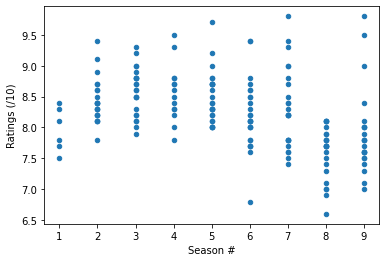

In [2]:
import matplotlib.pyplot as plt
off_df.plot.scatter(x = "Season #", y = "Ratings (/10)")

- From Seasons 1-5, it appears as though the ratings are fairly compact together with no clear outliers. Seasons 6, 7, and 9 appear to have much larger distributions for the ratings, with season 6 featuring episodes with ratings of 6.8 to 9.4. Season 8 features all of its episodes doing quite poorly in terms of ratings, featuring the lowest rated episode in the show's history being "Get the Girl" at a rating of 6.6/10.

<AxesSubplot:xlabel='Votes for Ratings', ylabel='Ratings (/10)'>

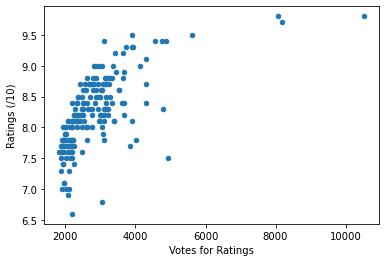

In [3]:
off_df.plot.scatter(x = "Votes for Ratings", y = "Ratings (/10)")

- There would appear to be a logarithmic relationship between Ratings and Votes for Ratings. Focusing on the 3 clear outliers with a large amount of votes and high ratings, one of them had appeared right after the Super Bowl and had been widely considered one of the funniest episodes: "Stress Relief", was about Dwight purposely setting a fire in an office trash can, causing absolute pandemonium. The other two of those episodes feature Michael in some major way: "Goodbye, Michael", was the last episode of Season 7 where Michael made his exit to the show due to NBC not renewing his contract, and "Finale", was the last episode of the show with Michael appearing as a surprise guest character at the end as the best man for Dwight's wedding to Angela.

<AxesSubplot:xlabel='Viewership (millions)', ylabel='Ratings (/10)'>

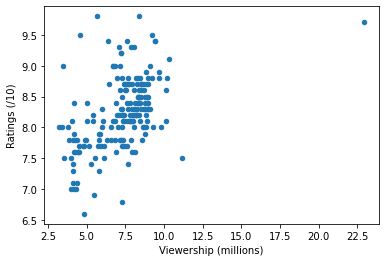

In [4]:
off_df.plot.scatter(x = "Viewership (millions)", y = "Ratings (/10)")

- It appears that all but one of the episodes, being the outlier, have a direct correlation between the Ratings and their Viewership. That one outlier is the episode "Stress Relief" that appeared after the Super Bowl, very likely influencing viewership for that episode.

<AxesSubplot:xlabel='Duration (min.)', ylabel='Ratings (/10)'>

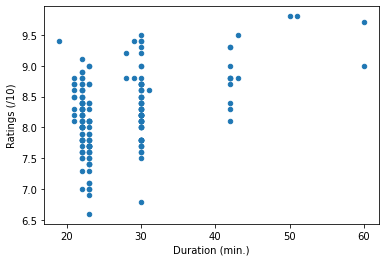

In [5]:
off_df.plot.scatter(x = "Duration (min.)", y = "Ratings (/10)")

- When episodes are 40 minutes and longer, the rating of the episode tends to be greater than the episodes that are less than 40 minutes. This may be due to the longer episodes being produced at a higher quality script, the audience being more engaged for longer, etc...

<AxesSubplot:xlabel='Num. of GuestStar(s)', ylabel='Ratings (/10)'>

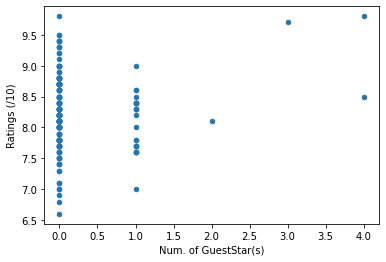

In [6]:
off_df.plot.scatter(x = "Num. of GuestStar(s)", y = "Ratings (/10)")

- It seems that for the few episodes with 3+ Guest Stars, there tends to be a larger rating. However, those episodes having a high rating likely may have been due to extraneous factors like quality and content of the episode, and not directly due to the number of Guest Stars present.  

# KNN REGRESSION

k should be 8


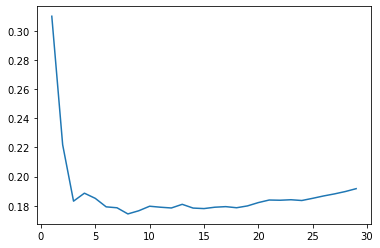

In [11]:
from sklearn.preprocessing import StandardScaler # scaling data
from sklearn.pipeline import make_pipeline # to combine StandardScalar() and KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor # what we want to do!
from sklearn.model_selection import cross_val_predict # to get predictions 
from sklearn.metrics import mean_squared_error, r2_score # test

# Votes, Viewership, onwards will be used as features for our model
# and our target will be Ratings
X = off_df.iloc[:, 3:]
y = off_df.iloc[:, 2]

#determine the optimal k to minimize mean-squared-error
error = []
for k in range(1,30):
    classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = k, weights = "distance"))
    y_pred = cross_val_predict(classifier_pipeline, X, y, cv = 5)
    error.append(mean_squared_error(y, y_pred))
plt.plot(range(1,30), error)
# tells us the k that produces the least mean-squared error with its model
print("k should be",error.index(min(error)) + 1)

- Graph above is Mean-Squared-Error vs. k, a minimum k occurs at k = 10, any larger, the MSE increases at a seemingly linear rate.

In [8]:
# Run KNN Regression
classifier_pipeline = make_pipeline(StandardScaler(), KNeighborsRegressor(n_neighbors = 8, weights = "distance"))
y_pred = cross_val_predict(classifier_pipeline, X, y, cv = 5)
y_pred

array([8.97516377, 9.10822499, 8.93077814, 9.00352497, 9.08851059,
       7.77662739, 8.84175528, 8.76173777, 8.42739852, 8.19107121,
       8.66061942, 8.65539087, 8.0870179 , 8.65477368, 8.05764447,
       8.65655853, 8.31777052, 8.78676127, 8.61307193, 8.60002894,
       7.92765049, 8.09967992, 8.65689433, 8.67532558, 8.6534992 ,
       8.6637107 , 8.69253421, 9.26800055, 8.83265775, 7.97236363,
       8.69585576, 8.54457652, 8.51414093, 8.56234452, 8.38590384,
       8.5494765 , 8.51713386, 8.79018399, 8.14429039, 8.41653209,
       8.52225379, 8.46490707, 8.14500494, 8.27490489, 8.12337609,
       8.63018034, 8.32980036, 8.41597817, 8.43453982, 8.6532964 ,
       8.86573981, 8.71091685, 8.69223922, 8.24241065, 8.67710931,
       8.18618732, 8.63562314, 8.56396667, 8.54883189, 9.02460092,
       8.38976157, 8.4131456 , 8.42996204, 8.39521645, 8.86201854,
       8.66866456, 8.39710219, 8.30640573, 8.39570896, 8.06008185,
       8.18644304, 8.44493975, 8.5500823 , 8.18562359, 8.40654

- This array represents the ratings produced by my model based on that episode's Viewership (million), Votes for the Rating, Duration of the episode, and the Number of Guest Stars for the episode.

In [9]:
print("Mean squared error is:", mean_squared_error(y, y_pred))
print("R^2 value is:", r2_score(y, y_pred))

Mean squared error is: 0.174445115416661
R^2 value is: 0.4960663282402774


# CONCLUSION

- My model has a R^2 value of 0.496 meaning that 49.6% of the variance present in Ratings can be explained through the variance of Votes for Rating, Viewership, Duration, and Num. of Guest Stars.
- In order to improve my model, I would employ methods to better assess which features more strongly correlate to Ratings, and find more features to add to the model as that will decrease bias like number of times a character had a line in an episode.
- Overall, I have produced a model that will predict the ratings of an episode of the Office based on numerous features such as Viewership, Votes for Rating, Duration, and Number of Guest Stars on the episode!